In [1]:
# Imports
import sys
sys.path.insert(0, '/home/lucas/LUCI/')  # Location of Luci
from LuciBase import Luci
import LUCI.LuciPlotting as lplt
import matplotlib.pyplot as plt
import numpy as np
%config Completer.use_jedi=False  # enable autocompletion when typing in Jupyter notebooks

2024-03-07 11:15:22.108587: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-07 11:15:22.819278: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Initialize paths and set parameters
Luci_path = '/home/lucas/LUCI/'
cube_dir = '/home/lucas/LUCI/Examples/crab_c3_field1'  # Full path to data cube (example 2)
cube_name = '2912251z'  # don't add .hdf5 extension
object_name = 'crab_square_1'
filter_name = 'C3'
redshift = 0.00347 # Redshift of object using Halpha measurements of Charlebois et al. (2010)
resolution = 1000 # The actual resolution is 400, but we don't have ML algorithms for that resolution, so use 1000

In [3]:
cube = Luci(Luci_path, cube_dir + '/' + cube_name, cube_dir, object_name, redshift, resolution)

Reading in data...


100%|█████████████████████████████████████| 2064/2064 [00:00<00:00, 4501.76it/s]


<Axes: xlabel='Wavelength [cm-1]', ylabel='Flux [ergs s$^{-1}$ cm$^{-2}$ $\\AA^{-1}$]'>

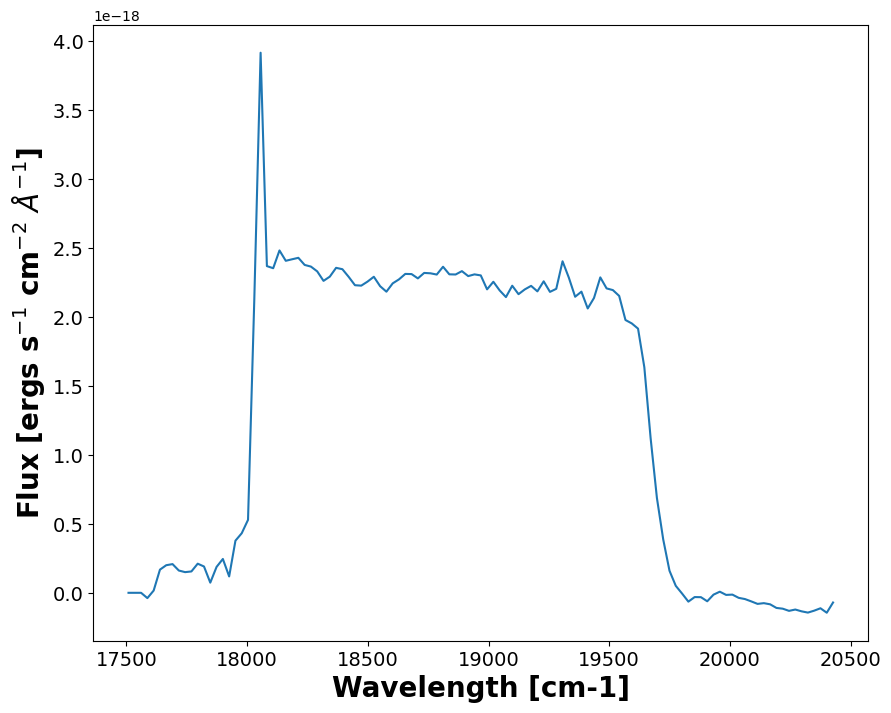

In [4]:
# We use 'mean = True' to take the mean of the emission in the region instead of the sum
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/test.reg', mean=True)
lplt.plot_spectrum(bkg_axis, bkg_sky)

2024-03-07 11:16:06.414510: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


<Axes: xlabel='Wavelength [cm-1]', ylabel='Flux [ergs s$^{-1}$ cm$^{-2}$ $\\AA^{-1}$]'>

<Figure size 640x480 with 0 Axes>

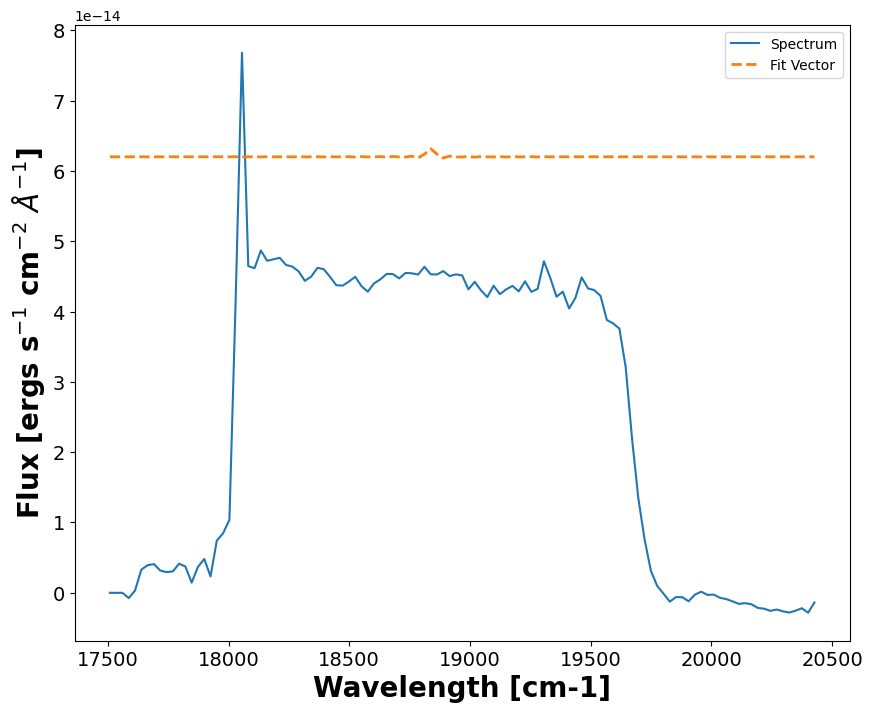

In [5]:
axis, sky, fit_dict = cube.fit_spectrum_region(
                            ['FeXIV5303', 'NI5200', 'FeVII5158', 'HeII5411'],
                            'sincgauss',
                            [1,1,1,1], [1,1,1,1],
                            region=cube_dir+'/test.reg', bkg=bkg_sky,
                            bayes_bool=False)
lplt.plot_fit(axis, sky, fit_dict['fit_vector'])